## Load Data

In [13]:
# fashion_mnist
import tensorflow as tf
import tensorflow.keras as keras
import numpy as np
tf.keras.utils.set_random_seed(1)
tf.config.experimental.enable_op_determinism()

(X_train, y_train), (X_test, y_test) = keras.datasets.fashion_mnist.load_data()
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


## Reshape Data

In [14]:
X_train = X_train.reshape(60000, -1)
X_test  = X_test.reshape(10000, -1)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(60000, 784)
(60000,)
(10000, 784)
(10000,)


## Normalization Inside Network (Custom Layer (Norm))

In [15]:
class MyNormalization(tf.keras.layers.Layer):
#################### YOUR CODE HERE ####################
# Các bạn tìm cách code tạo một custom layer cho riêng mình 
# Layer này yêu cầu các bạn thực hiện công thức output = (input - mean)/std
# tình mean  = tf.math.reduce_mean, và standard deviation = tf.math.reduce_std
    def __init__(self):
        super(MyNormalization, self).__init__()

    def call(self, input):
        mean_inp = tf.math.reduce_mean(input)
        std_inp = tf.math.reduce_std(input)
        return (input-mean_inp) / std_inp
########################################################

In [16]:
# solution 4: Normalization inside network (custom layer (norm))

initializer = tf.keras.initializers.RandomNormal()

#################### YOUR CODE HERE ####################
# Các bạn tìm cách code để add MyNormalization layer
# trước mỗi hidden layer
model = keras.Sequential()
model.add(keras.Input(shape=(784,)))
model.add(MyNormalization())
model.add(keras.layers.Dense(128, activation='sigmoid',
                             kernel_initializer=initializer))
model.add(MyNormalization())
model.add(keras.layers.Dense(128, activation='sigmoid',
                             kernel_initializer=initializer))
model.add(MyNormalization())
model.add(keras.layers.Dense(128, activation='sigmoid',
                             kernel_initializer=initializer))
model.add(MyNormalization())
model.add(keras.layers.Dense(128, activation='sigmoid',
                             kernel_initializer=initializer))
model.add(MyNormalization())
model.add(keras.layers.Dense(128, activation='sigmoid',
                             kernel_initializer=initializer))
model.add(MyNormalization())
model.add(keras.layers.Dense(128, activation='sigmoid',
                             kernel_initializer=initializer))
model.add(MyNormalization())
model.add(keras.layers.Dense(128, activation='sigmoid',
                             kernel_initializer=initializer))
model.add(keras.layers.Dense(10))
########################################################


# optimizer and loss
model.compile(optimizer=tf.keras.optimizers.SGD(), 
              loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True), 
              metrics=['accuracy'])

# training
batch_size = 512
history = model.fit(X_train, y_train, batch_size,
                    validation_data=(X_test, y_test),
                    epochs=300, verbose=2)

Epoch 1/300
118/118 - 5s - loss: 1.6684 - accuracy: 0.5390 - val_loss: 1.3040 - val_accuracy: 0.7056 - 5s/epoch - 44ms/step
Epoch 2/300
118/118 - 3s - loss: 1.1369 - accuracy: 0.7372 - val_loss: 1.0190 - val_accuracy: 0.7471 - 3s/epoch - 24ms/step
Epoch 3/300
118/118 - 3s - loss: 0.9267 - accuracy: 0.7645 - val_loss: 0.8687 - val_accuracy: 0.7626 - 3s/epoch - 24ms/step
Epoch 4/300
118/118 - 3s - loss: 0.8025 - accuracy: 0.7807 - val_loss: 0.7741 - val_accuracy: 0.7762 - 3s/epoch - 24ms/step
Epoch 5/300
118/118 - 3s - loss: 0.7192 - accuracy: 0.7955 - val_loss: 0.7018 - val_accuracy: 0.7929 - 3s/epoch - 24ms/step
Epoch 6/300
118/118 - 3s - loss: 0.6590 - accuracy: 0.8076 - val_loss: 0.6546 - val_accuracy: 0.8020 - 3s/epoch - 24ms/step
Epoch 7/300
118/118 - 3s - loss: 0.6144 - accuracy: 0.8172 - val_loss: 0.6173 - val_accuracy: 0.8092 - 3s/epoch - 24ms/step
Epoch 8/300
118/118 - 3s - loss: 0.5795 - accuracy: 0.8241 - val_loss: 0.5978 - val_accuracy: 0.8109 - 3s/epoch - 24ms/step
Epoch 9/

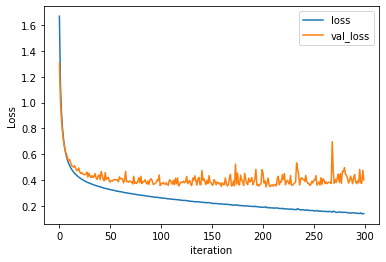

In [17]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('iteration')
plt.ylabel('Loss')
plt.legend()

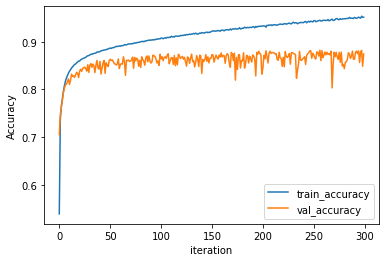

In [18]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='train_accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('iteration')
plt.ylabel('Accuracy')
plt.legend()